In [2]:
import numpy as np
import matplotlib.pyplot as plt

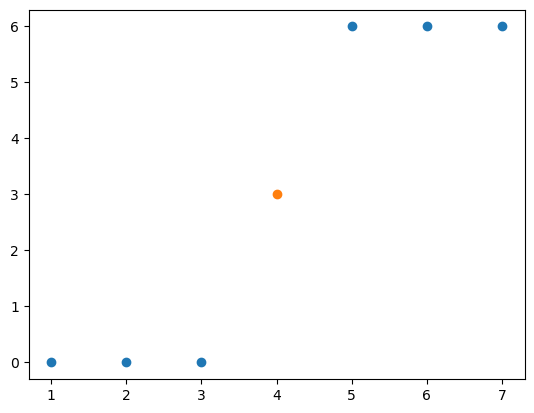

In [3]:
X = np.array([(1,0),(2,0),(3,0),(5,6),(6,6),(7,6)])
x = X[:,0]
y = X[:,1]

plt.scatter(x,y)
plt.scatter(np.mean(x),np.mean(y))
plt.show()

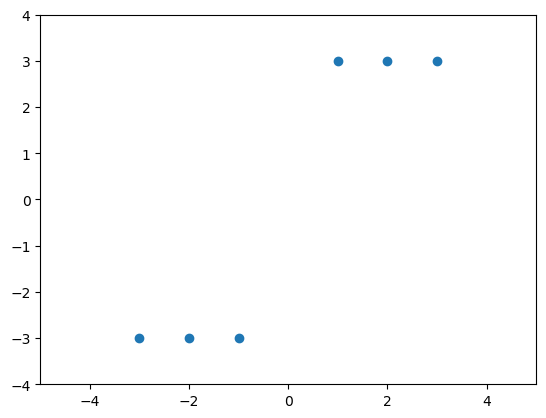

In [4]:
x_new = x - np.mean(x)
y_new = y - np.mean(y)

plt.scatter(x_new,y_new)
plt.xlim([-5,5])
plt.ylim([-4,4])
plt.show()

In [4]:
def pca_dim_reduction(X, M):
  assert X.ndim >= M, "M has to be less than dimensionality of X!"
         
  X_mean = np.zeros((len(X), len(X[0])))
  X_mean[:,0] = np.mean(X[:,0])*np.ones(6)
  X_mean[:,1] = np.mean(X[:,1])*np.ones(6)
  X_centered = X - X_mean 
  X_cov = np.cov(X_centered.T)
  eigen_values, eigen_vectors = np.linalg.eig(X_cov)
  top_M_idx = np.argsort(eigen_values)[::-1][:M]
  top_M_eigen_vectors = eigen_vectors[:,top_M_idx]
 
  return np.dot(X_centered, top_M_eigen_vectors)  

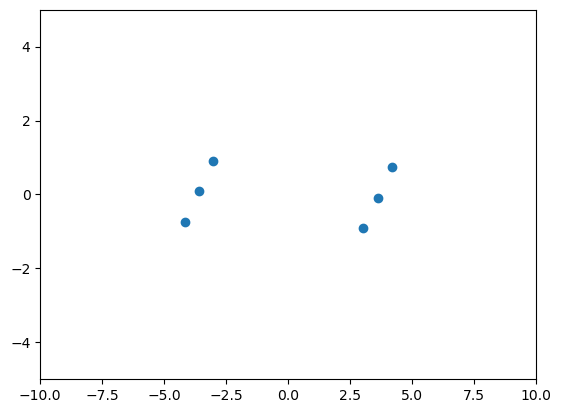

In [5]:
S = pca_dim_reduction(X,2)
plt.scatter(S[:,0], S[:,1])
plt.xlim([-10, 10])
plt.ylim([-5,5])
plt.show()

In [6]:
import numpy as np

# Chuẩn bị dữ liệu
X = np.array([(1,0),(2,0),(3,0),(5,6),(6,6),(7,6)])

# Trung bình của mỗi chiều dữ liệu
mean = np.mean(X, axis=0)

# Trừ đi giá trị trung bình của mỗi chiều dữ liệu
X_centered = X - mean

# Tính ma trận hiệp phương sai
covariance_matrix = np.cov(X_centered.T)
print("Ma trận hiệp phương sai:\n", covariance_matrix)

Ma trận hiệp phương sai:
 [[ 5.6  7.2]
 [ 7.2 10.8]]


In [7]:
# Tính toán các vector riêng và giá trị riêng
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Các giá trị riêng:\n", eigenvalues)
print("Các vector riêng:\n", eigenvectors)

Các giá trị riêng:
 [ 0.54493632 15.85506368]
Các vector riêng:
 [[-0.81842668 -0.57461097]
 [ 0.57461097 -0.81842668]]


In [8]:
# Chọn thành phần chính (PC1)
PC1 = eigenvectors[:,1]

# Tính transformed data
X_transformed = np.dot(X_centered, PC1)
print("Transformed data:\n", X_transformed)

Transformed data:
 [ 4.17911296  3.60450198  3.02989101 -3.02989101 -3.60450198 -4.17911296]


In [9]:
# Sử dụng hàm  PCA trong Scikit-learn 
from sklearn.decomposition import PCA

# Chuẩn bị dữ liệu
X = [(1,0),(2,0),(3,0),(5,6),(6,6),(7,6)]

# Khởi tạo PCA với số chiều giảm xuống là 1
pca = PCA(n_components=1)

# Thực hiện PCA trên dữ liệu
X_transformed = pca.fit_transform(X)

# In ra transformed data
print("Transformed data:\n", X_transformed)

Transformed data:
 [[ 4.17911296]
 [ 3.60450198]
 [ 3.02989101]
 [-3.02989101]
 [-3.60450198]
 [-4.17911296]]


In [ ]:
''' tính toán bằng hàm và bằng scikit-learn là giống nhau '''